# An exploration of clustering techniques

## A closer look at silhouette plots and their relation to elbow curves

Exploring the impact of cluster thightness in the data and the inferred number of clusters

## April 2018

In [67]:
# Render our plots inline
%matplotlib inline

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 1.- Generate blobs

In [116]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.95, shuffle=True, random_state=0)

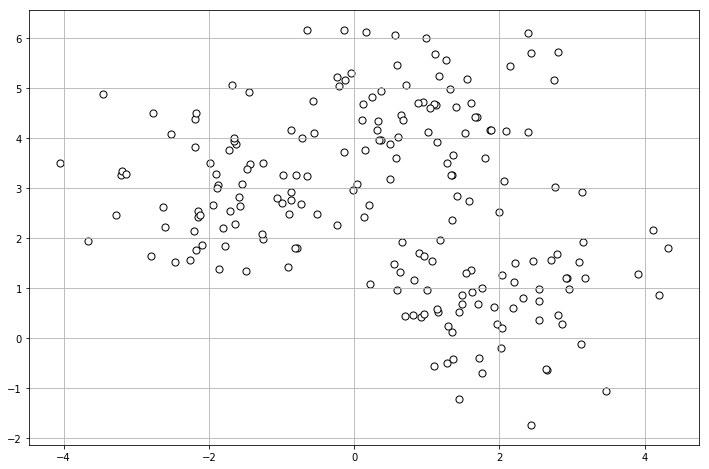

In [117]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()

# 2.- Elbow curve

In [118]:
distortions = []
for i in range(1, 15):

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

Text(0,0.5,'Distortion')

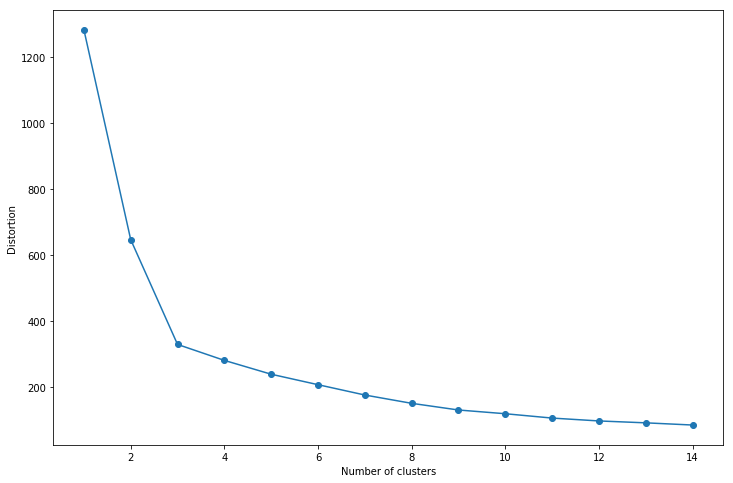

In [119]:
plt.figure(figsize=(12,8))

plt.plot(range(1,15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

# 3.- Use k-means to find clusters

In [122]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

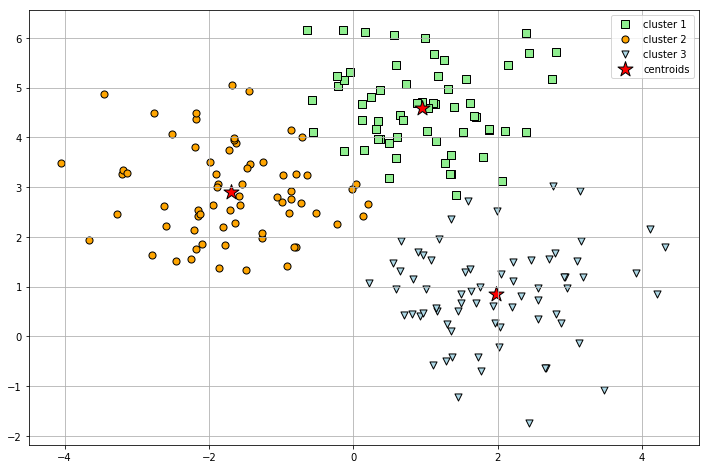

In [123]:
plt.figure(figsize=(12,8))

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
#plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='lightblue', marker='p', edgecolor='black', label='cluster 3')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', \
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()

# 4.- Distortion (within-cluster Sum of Squared Errors)

In [124]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 328.49


# 5.- Silhouette plot

## 5.1.- Compute silhouette coefficients

In [125]:
import numpy as np
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

## 5.2.- Generate silhouette plot

Text(0.5,0,'Silhouette coefficient')

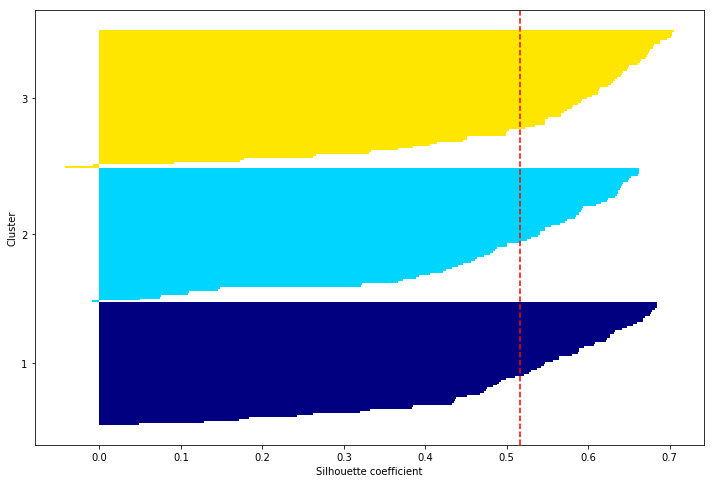

In [126]:
from matplotlib import cm

plt.figure(figsize=(12,8))

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):

    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1, edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')    